<a href="https://colab.research.google.com/github/AlexanderVieira/training_datascience/blob/main/smartstore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [87]:
import pandas as pd
import seaborn as sns
import datetime

In [143]:
def date_parser(str_date):  
  data = str_date.split(' ')
  date_formate = datetime.date(int(data[0].split('-')[0]),int(data[0].split('-')[1]),int(data[0].split('-')[2]))
  return date_formate

In [239]:
pedidos = pd.read_csv("/content/smartstore-pedidos.csv", 
                      sep=';', 
                      names = ['PEDIDO_ID', 'DATA_PEDIDO', 'USUARIO_ID', 'NOME_USUARIO', 'PRODUTO_ID', 'NOME_PRODUTO', 'QUANTIDADE_PRODUTO'])

In [240]:
pedidos_backup = pedidos.copy()

In [241]:
pedidos_backup

,PEDIDO_ID,DATA_PEDIDO,USUARIO_ID,NOME_USUARIO,PRODUTO_ID,NOME_PRODUTO,QUANTIDADE_PRODUTO
0,1,2022-02-04 14:11:21.1860000,1,Alexander,1,Redmi 9A 32GB,1
1,2,2022-02-04 19:30:23.8290000,2,Lenne,6,Redmi Note 10 5G 128GB,1
2,3,2022-02-04 19:39:24.7140000,3,Leticia,1,Redmi 9A 32GB,2
3,4,2022-02-04 19:48:57.6560000,4,Jonathan,1,Redmi 9A 32GB,1
4,5,2022-02-04 19:58:00.5970000,5,Jorge,6,Redmi Note 10 5G 128GB,1
5,5,2022-02-04 19:58:00.5970000,5,Jorge,1,Redmi 9A 32GB,2
6,6,2022-02-04 20:02:42.7700000,6,Paulo,6,Redmi Note 10 5G 128GB,1


In [242]:
pedidos_backup['NOME_PRODUTO']

0             Redmi 9A 32GB
1    Redmi Note 10 5G 128GB
2             Redmi 9A 32GB
3             Redmi 9A 32GB
4    Redmi Note 10 5G 128GB
5             Redmi 9A 32GB
6    Redmi Note 10 5G 128GB
Name: NOME_PRODUTO, dtype: object

In [243]:
pedidos['DATA_PEDIDO'] = pedidos['DATA_PEDIDO'].apply(date_parser)

In [244]:
pedidos

,PEDIDO_ID,DATA_PEDIDO,USUARIO_ID,NOME_USUARIO,PRODUTO_ID,NOME_PRODUTO,QUANTIDADE_PRODUTO
0,1,2022-02-04,1,Alexander,1,Redmi 9A 32GB,1
1,2,2022-02-04,2,Lenne,6,Redmi Note 10 5G 128GB,1
2,3,2022-02-04,3,Leticia,1,Redmi 9A 32GB,2
3,4,2022-02-04,4,Jonathan,1,Redmi 9A 32GB,1
4,5,2022-02-04,5,Jorge,6,Redmi Note 10 5G 128GB,1
5,5,2022-02-04,5,Jorge,1,Redmi 9A 32GB,2
6,6,2022-02-04,6,Paulo,6,Redmi Note 10 5G 128GB,1


In [245]:
pedidos_agrupados = pedidos.groupby(['NOME_PRODUTO', 'DATA_PEDIDO'])['QUANTIDADE_PRODUTO'].agg([sum]).reset_index()

In [246]:
pedidos_agrupados

,NOME_PRODUTO,DATA_PEDIDO,sum
0,Redmi 9A 32GB,2022-02-04,6
1,Redmi Note 10 5G 128GB,2022-02-04,3


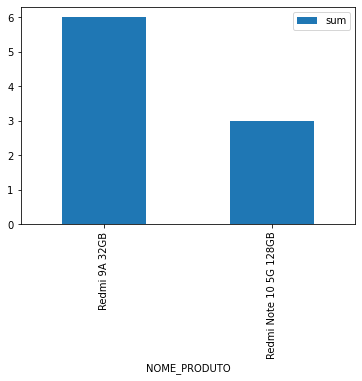

In [247]:
pedidos_agrupados.plot.bar(x='NOME_PRODUTO')

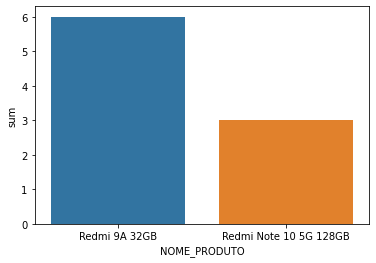

In [248]:
sns.barplot(x = 'NOME_PRODUTO', y = 'sum', data=pedidos_agrupados);

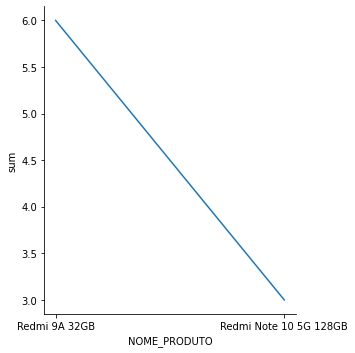

In [249]:
sns.relplot(x='NOME_PRODUTO', y='sum', kind='line', data=pedidos_agrupados);

In [274]:
database = pedidos_agrupados.copy()
database.DATA_PEDIDO = pd.to_datetime(pedidos_agrupados.DATA_PEDIDO)
database.DATA_PEDIDO = database.DATA_PEDIDO.dt.month_name()
database

,NOME_PRODUTO,DATA_PEDIDO,sum
0,Redmi 9A 32GB,February,6
1,Redmi Note 10 5G 128GB,February,3


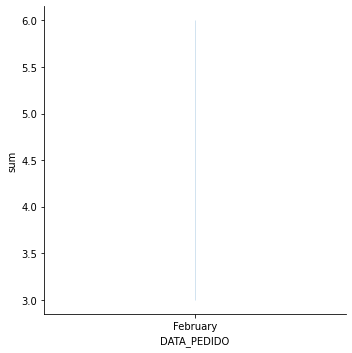

In [273]:
sns.relplot(x = 'DATA_PEDIDO', y = 'sum', kind='line', data=database);

In [263]:
max = database[database['sum'] == database['sum'].max()]
max

,NOME_PRODUTO,DATA_PEDIDO,sum
0,Redmi 9A 32GB,February,6
